In [35]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r"F:\PGA 08\Machine Learning using python\loan\train_u6lujuX_CVtuZ9i (1).csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
data.shape


(614, 13)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [38]:
data.drop('Loan_ID',axis=1, inplace=True)

# Exploratory Data Analysis

In [39]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [40]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

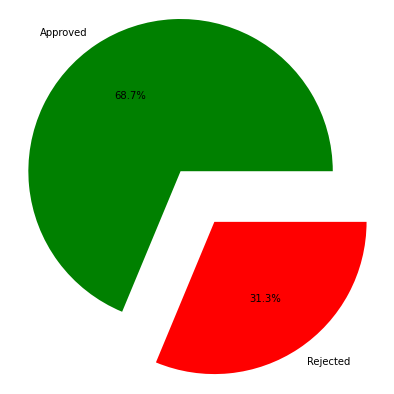

In [41]:
plt.figure(figsize=(12,7))
labels = ['Approved','Rejected']
explode= [ .2,.2]
mycolors=['Green','Red']
sizes= data.Loan_Status.value_counts().values
plt.pie(sizes,explode,labels,autopct='%1.1f%%',colors=mycolors)
plt.show()

### From the above pie chart, we can observe that around 69% of the applications has been approved where as 31% applications has been rejected which indicates that about 2/3rd of the applicants has been granted the loan.

In [42]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [43]:
#visualize the distribution of numerical data
data_num = data.select_dtypes(include=np.number)
data_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [44]:
data_num.drop(['Loan_Amount_Term','Credit_History'],axis=1,inplace=True)

In [45]:
data_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


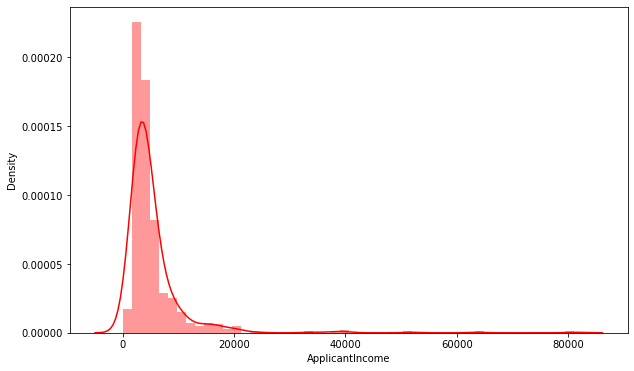

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


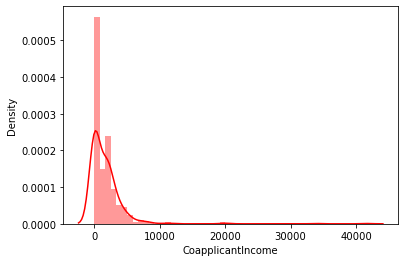

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


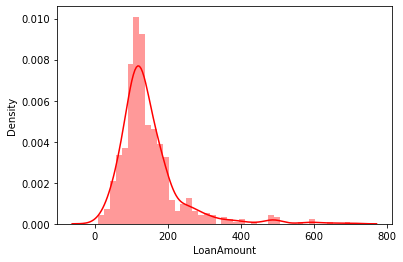

In [46]:
plt.figure(figsize=(10,6))
for i in data_num.columns:
    sns.distplot(data[i],color='red')
    plt.show()

C:\Users\91954\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


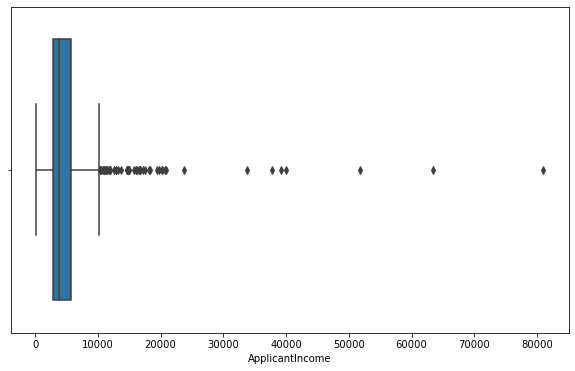

C:\Users\91954\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


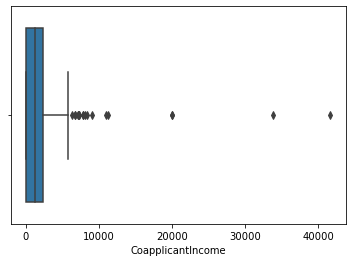

C:\Users\91954\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


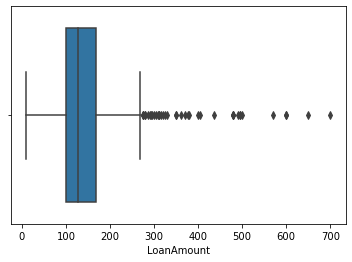

In [47]:
plt.figure(figsize=(10,6))
for i in data_num.columns:
    sns.boxplot(data[i])
    plt.show()

### From the above charts we can observe that the features contains an outliers and we are getting skewed distribution as well so that's why we need to handle the otliers with IQR method

In [48]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

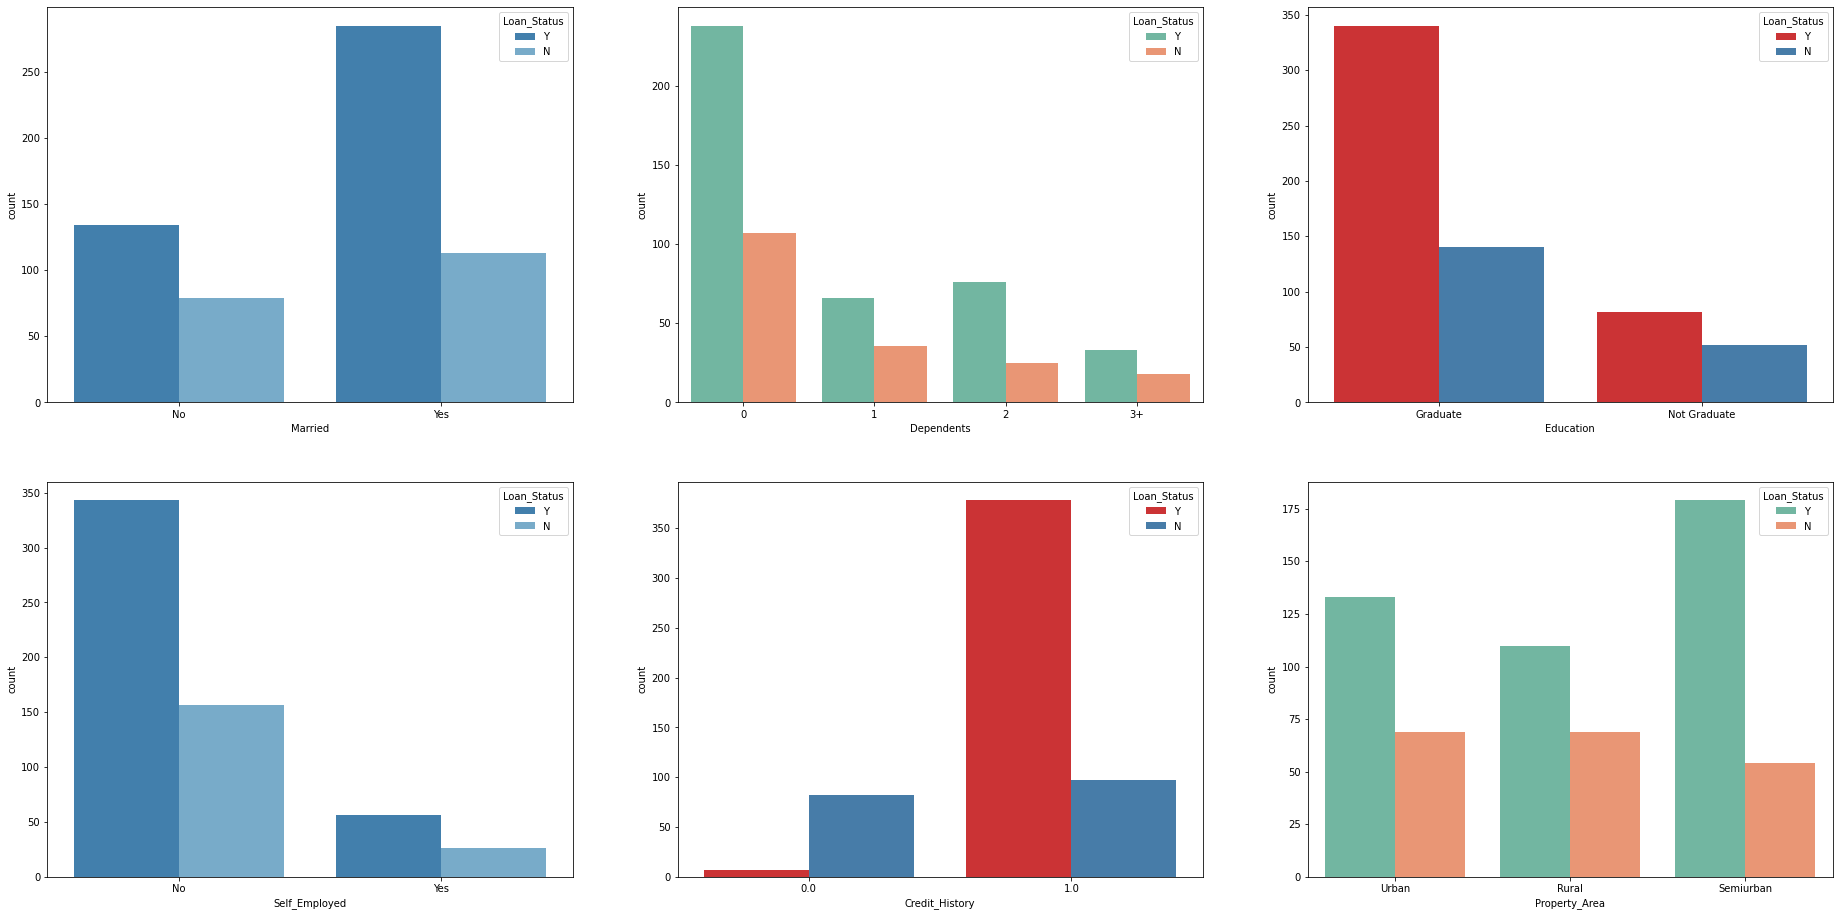

In [49]:
#Plot the countplot to analyze the relation b/w dependent and independent variables
fig,ax=plt.subplots(2,3,figsize=(32,16))
sns.countplot(x='Married',hue='Loan_Status',data=data,palette='tab20c',ax=ax[0][0])
sns.countplot(x= 'Dependents',hue='Loan_Status',data=data,palette='Set2',ax=ax[0][1])
sns.countplot(x='Education',hue='Loan_Status',data=data,palette='Set1',ax=ax[0][2])
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data,palette='tab20c',ax=ax[1][0])
sns.countplot(x= 'Credit_History',hue='Loan_Status',data=data,palette='Set1',ax=ax[1][1])
sns.countplot(x='Property_Area',hue='Loan_Status',data=data,palette='Set2',ax=ax[1][2])
plt.show()

# Feature engineering

In [50]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)


In [53]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder

feature_cols = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for x in feature_cols:
    data[x] = le.fit_transform(data[x])

In [56]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Outlier Detection/Handling

In [57]:
#Outlier Treatment for Applicant Income
Q1=data.ApplicantIncome.quantile(0.25)
Q3=data.ApplicantIncome.quantile(0.75)
IQR=Q3-Q1
data=data[(data.ApplicantIncome>=Q1-1.5*IQR)&(data.ApplicantIncome<=Q3+1.5*IQR)]

In [58]:
#Outlier Treatment for CoapplicantIncome
Q1=data.CoapplicantIncome.quantile(0.25)
Q3=data.CoapplicantIncome.quantile(0.75)
IQR=Q3-Q1
data=data[(data.CoapplicantIncome>=Q1-1.5*IQR)&(data.CoapplicantIncome<=Q3+1.5*IQR)]

In [59]:
#Outlier Treatment for LoanAmount
Q1=data.LoanAmount.quantile(0.25)
Q3=data.LoanAmount.quantile(0.75)
IQR=Q3-Q1
data=data[(data.LoanAmount>=Q1-1.5*IQR)&(data.LoanAmount<=Q3+1.5*IQR)]

C:\Users\91954\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91954\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91954\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


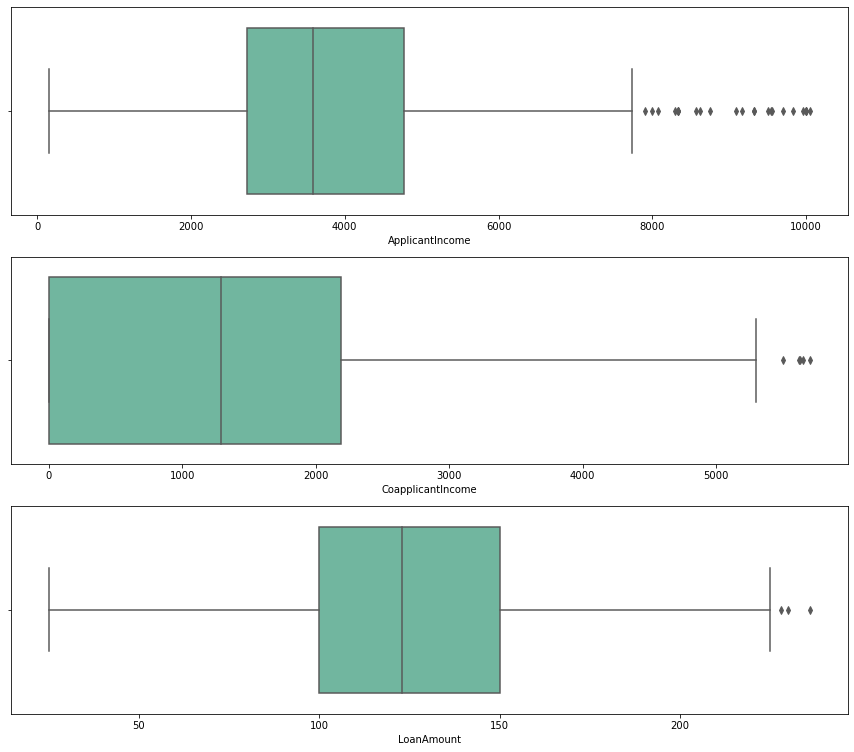

In [60]:
## Visualize the boxplot after treatment

fig, axs = plt.subplots(3,1, figsize = (15, 13))
plt1 = sns.boxplot(data['ApplicantIncome'], ax = axs[0], palette = 'BuGn')
plt1 = sns.boxplot(data['CoapplicantIncome'], ax = axs[1], palette = 'BuGn')
plt1 = sns.boxplot(data['LoanAmount'], ax = axs[2], palette = 'BuGn')

plt.show()

# Feature Selection

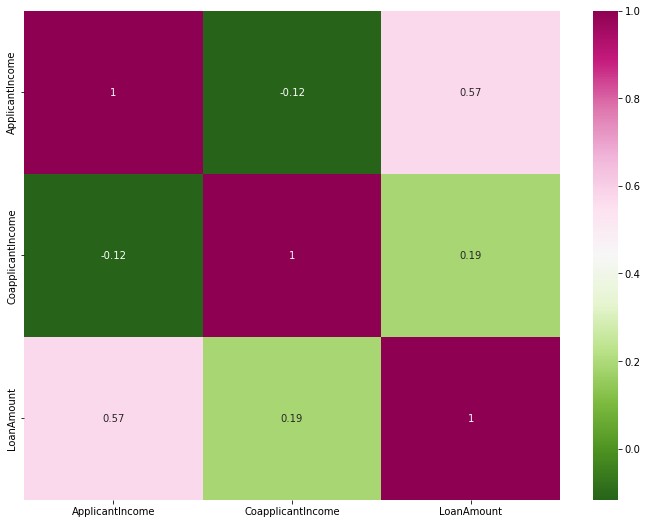

In [79]:
#analyze the relation b/w dependent and independent variables using corelarion/Heatmap
plt.figure(figsize=(12,9))
#cor=data.corr()
cor=data_num.corr()
sns.heatmap(cor,annot=True,cmap='PiYG_r')
plt.show()

In [66]:
# chi square Test
from sklearn.feature_selection import chi2

In [67]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [68]:
df=data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
         'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]


In [69]:
x1=df.drop('Loan_Status',axis='columns')
y1=df['Loan_Status']

In [70]:
#return f_score and p_values
f_score=chi2(x1,y1)
f_score

(array([ 0.1997959 ,  1.16318823,  0.02853975,  5.36803727,  0.09226792,
         2.8698891 , 25.21033279,  0.50912984]),
 array([6.54885643e-01, 2.80805309e-01, 8.65846097e-01, 2.05090427e-02,
        7.61313525e-01, 9.02510884e-02, 5.14060438e-07, 4.75515783e-01]))

In [71]:
p_value=pd.Series(f_score[1],index=x1.columns)
p_value=p_value.sort_values(ascending=True)
p_value

Credit_History      5.140604e-07
Education           2.050904e-02
Loan_Amount_Term    9.025109e-02
Married             2.808053e-01
Property_Area       4.755158e-01
Gender              6.548856e-01
Self_Employed       7.613135e-01
Dependents          8.658461e-01
dtype: float64

In [73]:
cols=[]
for i in p_value.index:
    if p_value[i]<=0.05:
        print(i,':-Reject Null Hypothesis')
    else:
        print(i,':-Accept Null Hypothesis')
        cols.append(i)
    

Credit_History :-Reject Null Hypothesis
Education :-Reject Null Hypothesis
Loan_Amount_Term :-Accept Null Hypothesis
Married :-Accept Null Hypothesis
Property_Area :-Accept Null Hypothesis
Gender :-Accept Null Hypothesis
Self_Employed :-Accept Null Hypothesis
Dependents :-Accept Null Hypothesis


In [80]:
#drop the features that will not add any value to my model
#data.drop(labels=cols,axis=1,inplace=True)
data.drop(labels = cols, axis = 1, inplace = True)

KeyError: "['Loan_Amount_Term', 'Married', 'Property_Area', 'Gender', 'Self_Employed', 'Dependents'] not found in axis"

In [81]:
data.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0,1.102649,-0.590370,0.10,1.0,1
1,0,0.484560,0.097901,0.10,1.0,0
2,0,-0.288295,-0.590370,-1.14,1.0,1
3,1,-0.491883,0.485851,-0.06,1.0,1
4,0,1.176370,-0.590370,0.36,1.0,1


## Feature Scaling--->> MinMax scaler

In [76]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=scaler.fit_transform(data[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
data.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0,1.102649,-0.590370,0.10,1.0,1
1,0,0.484560,0.097901,0.10,1.0,0
2,0,-0.288295,-0.590370,-1.14,1.0,1
3,1,-0.491883,0.485851,-0.06,1.0,1
4,0,1.176370,-0.590370,0.36,1.0,1


In [82]:
#Data Spliting
X = data.drop('Loan_Status', axis = 1)
y = data['Loan_Status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.shape, X_test.shape

((416, 5), (104, 5))

## Model Building

In [83]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# create the instance of logistic regression model
model = LogisticRegression()

# fit the model
model.fit(X_train, y_train)

LogisticRegression()

In [84]:
# Make a prediction for the training set
y_pred_tr = model.predict(X_train)

In [85]:
# Make a prediction for the testing set
y_pred_te = model.predict(X_test)

## Model Evaluation

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

In [87]:
# print the accuracy on training data and test data

print("Accuracy Score on training data:", accuracy_score(y_train, y_pred_tr))
print("Accuracy Score on test data:", accuracy_score(y_test, y_pred_te))

Accuracy Score on training data: 0.8293269230769231
Accuracy Score on test data: 0.8076923076923077


In [88]:
# print the precison-score

print('Precision Score:', precision_score(y_test, y_pred_te))

Precision Score: 0.7976190476190477


In [89]:
# print the recall-score

print('Recall Score:', recall_score(y_test, y_pred_te))

Recall Score: 0.9571428571428572


In [90]:
# print the F1-score

print('F1 Score:', f1_score(y_test, y_pred_te))

F1 Score: 0.8701298701298702


In [91]:
# print the classification report

print(classification_report(y_test, y_pred_te))

              precision    recall  f1-score   support

           0       0.85      0.50      0.63        34
           1       0.80      0.96      0.87        70

    accuracy                           0.81       104
   macro avg       0.82      0.73      0.75       104
weighted avg       0.81      0.81      0.79       104



<function matplotlib.pyplot.show(close=None, block=None)>

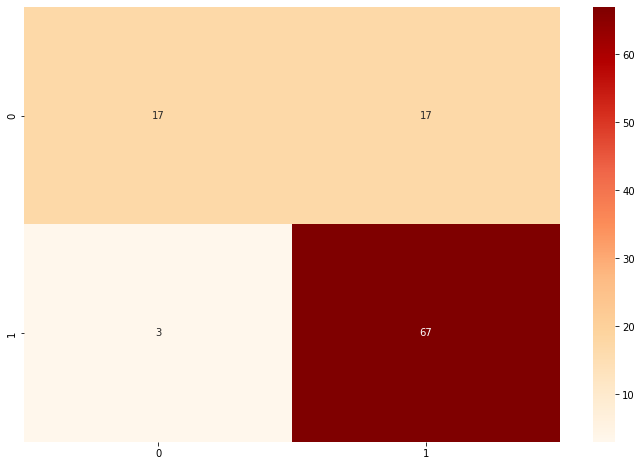

In [92]:
## Plot the confusion matrix

plt.figure(figsize = (12, 8))

cm = confusion_matrix(y_test, y_pred_te)
sns.heatmap(cm, annot = True, cmap = 'OrRd')
plt.show

In [93]:
input_data = (1, 1.010, 0.097901, 0.10, 1)

input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

print('the status of the loan is:', prediction[0])


the status of the loan is: 1


C:\Users\91954\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
